# Parte 1

## Colab e Kaggle

Nós vamos usar uma base de dados do Kaggle chamada [Fraud Detection Example](https://www.kaggle.com/gopalmahadevan/fraud-detection-example) e ela tem uma fração de dados do [PaySim](https://github.com/EdgarLopezPhD/PaySim), um simulador de dados financeiros feito exatamente para detecção de fraude.

**Variáveis do dataset**

**step** - mapeia uma unidade de tempo no mundo real. Neste caso, 1 passo é 1 hora de tempo. Total de etapas 744 (simulação de 30 dias).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER. 
(caixa-de-entrada, caixa-de-saida, débito, pagamento e transferência)

**amount** - valor da transação em moeda local.

**nameOrig** - cliente que iniciou a transação

**oldbalanceOrg** - saldo inicial antes da transação

**newbalanceOrig** - novo saldo após a transação

**nameDest** - cliente que é o destinatário da transação

**oldbalanceDest** - destinatário do saldo inicial antes da transação. 
Observe que não há informações para clientes que começam com M (Comerciantes).

**newbalanceDest** - novo destinatário do saldo após a transação. Observe que não há informações para clientes que começam com M (Comerciantes).

**isFraud** - São as transações feitas pelos agentes fraudulentos dentro da simulação. Neste conjunto de dados específico, o comportamento fraudulento dos agentes visa lucrar ao assumir o controle das contas dos clientes e tentar esvaziar os fundos transferindo para outra conta e depois sacando do sistema.

**isFlaggedFraud** - O modelo de negócios visa controlar transferências massivas de uma conta para outra e sinaliza tentativas ilegais. Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação.


# Parte 2

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/fraud_dataset_example.csv')
df

step      type      amount     nameOrig  oldbalanceOrg  \
0          1   PAYMENT     9839.64  C1231006815      170136.00   
1          1   PAYMENT     1864.28  C1666544295       21249.00   
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
4          1   PAYMENT    11668.14  C2048537720       41554.00   
...      ...       ...         ...          ...            ...   
101608    10   PAYMENT     7477.02   C513257306         785.00   
101609    10  CASH_OUT   282252.35   C210473293      220339.29   
101610    10   PAYMENT    17289.01   C807582280           0.00   
101611    10  TRANSFER  1347146.45  C1315779140        1605.00   
101612    10  CASH_OUT   469539.21   C515691325       31133.00   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0            160296.36  M1979787155            0.00            0.00        0   
1             19384.72  M2044282225            0.00            0.00        0   
2                 0.00   C553264065            0.00            0.00        1   
3                 0.00    C38997010        21182.00            0.00        1   
4             29885.86  M1230701703            0.00            0.00        0   
...                ...          ...             ...             ...      ...   
101608            0.00   M524833426            0.00            0.00        0   
101609            0.00  C1172042998        95156.01        91286.97        0   
101610            0.00   M334249577            0.00            0.00        0   
101611            0.00  C1631408038       541639.43      2186953.43        0   
101612            0.00  C1383702768            0.00       469539.21        0   

        isFlaggedFraud  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
101608               0  
101609               0  
101610               0  
101611               0  
101612               0  

[101613 rows x 11 columns]

In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Análise com Pandas

### Trazendo as colunas de fraude para o começo do dataset

In [4]:
df = df[['isFraud', 'isFlaggedFraud', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'newbalanceDest']]
df.head()

isFraud  isFlaggedFraud  step      type    amount     nameOrig  \
0        0               0     1   PAYMENT   9839.64  C1231006815   
1        0               0     1   PAYMENT   1864.28  C1666544295   
2        1               0     1  TRANSFER    181.00  C1305486145   
3        1               0     1  CASH_OUT    181.00   C840083671   
4        0               0     1   PAYMENT  11668.14  C2048537720   

   oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  
0       170136.0       160296.36  M1979787155             0.0             0.0  
1        21249.0        19384.72  M2044282225             0.0             0.0  
2          181.0            0.00   C553264065             0.0             0.0  
3          181.0            0.00    C38997010         21182.0             0.0  
4        41554.0        29885.86  M1230701703             0.0             0.0

### Renomeando as colunas

Criando um dicionário
```
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}
```

In [5]:
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}

In [6]:
df = df.rename(columns = colunas)
df.head()

fraude  super_fraude  tempo      tipo     valor     cliente1  \
0       0             0      1   PAYMENT   9839.64  C1231006815   
1       0             0      1   PAYMENT   1864.28  C1666544295   
2       1             0      1  TRANSFER    181.00  C1305486145   
3       1             0      1  CASH_OUT    181.00   C840083671   
4       0             0      1   PAYMENT  11668.14  C2048537720   

   saldo_inicial_c1  novo_saldo_c1     cliente2  saldo_inicial_c2  \
0          170136.0      160296.36  M1979787155               0.0   
1           21249.0       19384.72  M2044282225               0.0   
2             181.0           0.00   C553264065               0.0   
3             181.0           0.00    C38997010           21182.0   
4           41554.0       29885.86  M1230701703               0.0   

   novo_saldo_c2  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

### Outras informações do dataset

In [7]:
df.describe()

fraude  super_fraude          tempo         valor  \
count  101613.000000      101613.0  101613.000000  1.016130e+05   
mean        0.001142           0.0       8.523457  1.740901e+05   
std         0.033768           0.0       1.820681  3.450199e+05   
min         0.000000           0.0       1.000000  3.200000e-01   
25%         0.000000           0.0       8.000000  1.001659e+04   
50%         0.000000           0.0       9.000000  5.338541e+04   
75%         0.000000           0.0      10.000000  2.124984e+05   
max         1.000000           0.0      10.000000  1.000000e+07   

       saldo_inicial_c1  novo_saldo_c1  saldo_inicial_c2  novo_saldo_c2  
count      1.016130e+05   1.016130e+05      1.016130e+05   1.016130e+05  
mean       9.071753e+05   9.234992e+05      8.810428e+05   1.183998e+06  
std        2.829575e+06   2.867319e+06      2.399949e+06   2.797761e+06  
min        0.000000e+00   0.000000e+00      0.000000e+00   0.000000e+00  
25%        0.000000e+00   0.000000e+00      0.000000e+00   0.000000e+00  
50%        2.019047e+04   0.000000e+00      2.105800e+04   5.178343e+04  
75%        1.947150e+05   2.192178e+05      5.919217e+05   1.063122e+06  
max        3.893942e+07   3.894623e+07      3.400874e+07   3.894623e+07

O método describe() fornece as informações sobre:

**count** - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

**mean** - O valor médio, em média aritmética. Como ele faz uma média aritmética nem sempre mostra a realidade da maior parte dos casos do banco de dados.

**std** - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

**min** e **max** - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

**quartis** - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.

Para saber mais sobre esse método, acesse o artigo [Ampliando a análise com o Describe](https://www.alura.com.br/artigos/ampliando-a-analise-com-describe).


In [8]:
df.describe().T #Matriz transposta é comando para seja feita a troca de linhas por colunas

count          mean           std   min       25%  \
fraude            101613.0  1.141586e-03  3.376824e-02  0.00      0.00   
super_fraude      101613.0  0.000000e+00  0.000000e+00  0.00      0.00   
tempo             101613.0  8.523457e+00  1.820681e+00  1.00      8.00   
valor             101613.0  1.740901e+05  3.450199e+05  0.32  10016.59   
saldo_inicial_c1  101613.0  9.071753e+05  2.829575e+06  0.00      0.00   
novo_saldo_c1     101613.0  9.234992e+05  2.867319e+06  0.00      0.00   
saldo_inicial_c2  101613.0  8.810428e+05  2.399949e+06  0.00      0.00   
novo_saldo_c2     101613.0  1.183998e+06  2.797761e+06  0.00      0.00   

                       50%         75%          max  
fraude                0.00        0.00         1.00  
super_fraude          0.00        0.00         0.00  
tempo                 9.00       10.00        10.00  
valor             53385.41   212498.40  10000000.00  
saldo_inicial_c1  20190.47   194715.00  38939424.03  
novo_saldo_c1         0.00   219217.76  38946233.02  
saldo_inicial_c2  21058.00   591921.70  34008736.98  
novo_saldo_c2     51783.43  1063121.64  38946233.02

In [9]:
df.shape

(101613, 11)

In [10]:
df.info() #vendo os tipos de informações que temos no DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   super_fraude      101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


### Verificando a variável target

In [11]:
df.groupby('fraude').tempo.count() #coluna Fraude + tempo e contamos.

fraude
0    101497
1       116
Name: tempo, dtype: int64

In [12]:
df.isnull().values.any() #sem o ANY conta todas as colunas, com o ANY faz uma varredura e traz se temos algum ou não

False

## Encoding

### Pandas Profiling

Instalando o Pandas Profiling

```!pip install -U pandas-profiling```

In [13]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 5.3 MB/s 
     |████████████████████████████████| 4.7 MB 67.6 MB/s 
     |████████████████████████████████| 102 kB 9.1 MB/s 
     |████████████████████████████████| 690 kB 33.7 MB/s 
     |████████████████████████████████| 596 kB 31.2 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 812 kB 54.8 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=d35d59c0bbcb67770228976badf9e28066c93372ec493353b5271b1e4f6bb33e
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=b74941e28a547da90286787a59d930f3d9c3a1188f957b8b78b9b935b27ef330
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb094077697

In [14]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.5) ...


In [15]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!apt-get -qq install -y graphviz && pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 29.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 20.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 29.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 21.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.6 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m

In [18]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155685 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 7.2 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=8d85384c3f36632f579af8adbcbfffc9c26f17da55026981ea8a0fee54a1e247
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [19]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [20]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Aplicando o Encoding

#### **Tipos de encoding**

**Label Encoding** - Renomea as classes com valores numéricos de 1 a **n**, sendo n o número de classes. Pode existir hierarquia entre as classes.

**One-Hot Encoding** - Transforma as variáveis em **n** colunas binárias, sendo n o número de classes. Todas as classes são analisadas de forma igual, quando tiver a ocorrência dela a coluna terá o valor 1 e quando não o valor 0, isso acontece para as demais colunas criadas.



In [21]:
df = pd.get_dummies(data=df, columns=['tipo']) #transformando o df com 0 e 1 para o tipo de pagamento feito pelo cliente.
df.head()

fraude  super_fraude  tempo     valor     cliente1  saldo_inicial_c1  \
0       0             0      1   9839.64  C1231006815          170136.0   
1       0             0      1   1864.28  C1666544295           21249.0   
2       1             0      1    181.00  C1305486145             181.0   
3       1             0      1    181.00   C840083671             181.0   
4       0             0      1  11668.14  C2048537720           41554.0   

   novo_saldo_c1     cliente2  saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  \
0      160296.36  M1979787155               0.0            0.0             0   
1       19384.72  M2044282225               0.0            0.0             0   
2           0.00   C553264065               0.0            0.0             0   
3           0.00    C38997010           21182.0            0.0             0   
4       29885.86  M1230701703               0.0            0.0             0   

   tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0              0           0             1              0  
1              0           0             1              0  
2              0           0             0              1  
3              1           0             0              0  
4              0           0             1              0

#### Removendo variáveis

In [22]:
df = df.drop(['cliente1','cliente2','super_fraude'], axis = 1) #removendo a coluna que não houve Super Fraude e do cliente para não ter o dado sensível exposto

In [23]:
df.head()

fraude  tempo     valor  saldo_inicial_c1  novo_saldo_c1  saldo_inicial_c2  \
0       0      1   9839.64          170136.0      160296.36               0.0   
1       0      1   1864.28           21249.0       19384.72               0.0   
2       1      1    181.00             181.0           0.00               0.0   
3       1      1    181.00             181.0           0.00           21182.0   
4       0      1  11668.14           41554.0       29885.86               0.0   

   novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  \
0            0.0             0              0           0             1   
1            0.0             0              0           0             1   
2            0.0             0              0           0             0   
3            0.0             0              1           0             0   
4            0.0             0              0           0             1   

   tipo_TRANSFER  
0              0  
1              0  
2              1  
3              0  
4              0

# Parte 3

## Regressão Logística

In [24]:
x = df.drop('fraude', axis=1)
y = df['fraude']

In [25]:
from sklearn.model_selection import train_test_split #importando o modelo de ML para separar todos os modelos de treinos e testes

SEED = 42

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.25, random_state=SEED) #0.25 = 25% vai ser utilizado para fazer os testes e treinar com o restante

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred)) #busca os positivos ( fraudes verdadeiras )
print("Recall:",metrics.recall_score(y_test, y_pred)) #avalia corretamente as classes
print("F1:",metrics.f1_score(y_test, y_pred)) #média armonica

Acurácia: 0.9989765391276965
Precisão: 0.2
Recall: 0.043478260869565216
F1: 0.07142857142857142


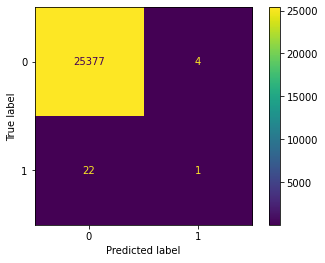

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

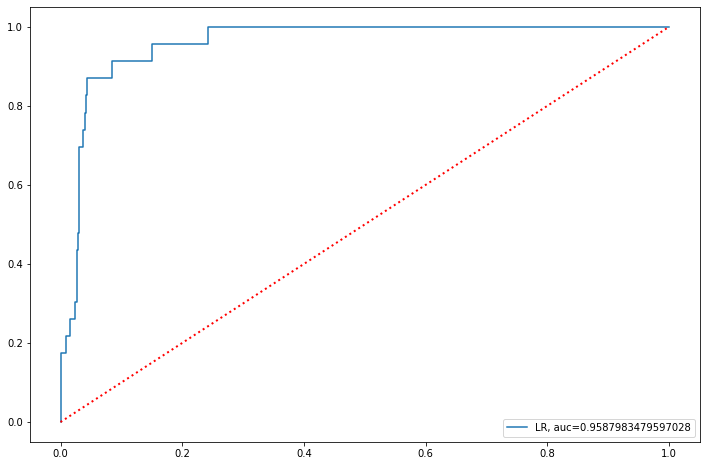

In [28]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle=':')
plt.legend(loc=4)

## Balanceamento de dados

In [29]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 5.2 MB/s 
     |████████████████████████████████| 199 kB 41.9 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [30]:
from imblearn.over_sampling import SMOTE
import numpy as np

SEED=42

smote = SMOTE(random_state=42)

In [31]:
x = df.drop('fraude', axis=1)
y = df ['fraude']

In [32]:
x_resample, y_resample = smote.fit_resample(x ,y)

In [33]:
df_balanced = pd.concat([y_resample, x_resample], axis=1)
df_balanced

fraude  tempo          valor  saldo_inicial_c1  novo_saldo_c1  \
0            0      1    9839.640000     170136.000000      160296.36   
1            0      1    1864.280000      21249.000000       19384.72   
2            1      1     181.000000        181.000000           0.00   
3            1      1     181.000000        181.000000           0.00   
4            0      1   11668.140000      41554.000000       29885.86   
...        ...    ...            ...               ...            ...   
202989       1      5   17608.962863      17608.962863           0.00   
202990       1      7   12116.291013      12116.291013           0.00   
202991       1      1  231612.880715     231612.880715           0.00   
202992       1      9  547325.144758     547325.144758           0.00   
202993       1      4  159298.594420     159298.594420           0.00   

        saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  \
0               0.000000       0.000000             0              0   
1               0.000000       0.000000             0              0   
2               0.000000       0.000000             0              0   
3           21182.000000       0.000000             0              1   
4               0.000000       0.000000             0              0   
...                  ...            ...           ...            ...   
202989          0.000000       0.000000             0              0   
202990          0.000000       0.000000             0              0   
202991       1945.589357    9370.603471             0              0   
202992          0.000000       0.000000             0              0   
202993          0.000000       0.000000             0              0   

        tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0                0             1              0  
1                0             1              0  
2                0             0              1  
3                0             0              0  
4                0             1              0  
...            ...           ...            ...  
202989           0             0              1  
202990           0             0              1  
202991           0             0              0  
202992           0             0              1  
202993           0             0              1  

[202994 rows x 12 columns]

In [34]:
df_balanced.groupby('fraude').tempo.count() #Verificando se os dados criados foram aleatórios ou se duplicou, aqui vemos que duplicou.

fraude
0    101497
1    101497
Name: tempo, dtype: int64

In [35]:
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

In [36]:
from sklearn.model_selection import train_test_split

SEED = 42
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.25, random_state=SEED)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred)) #busca os positivos ( fraudes verdadeiras )
print("Recall:",metrics.recall_score(y_test, y_pred)) #avalia corretamente as classes ( sensibilidade )
print("F1:",metrics.f1_score(y_test, y_pred)) #média armonica

Acurácia: 0.9417722516699837
Precisão: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975


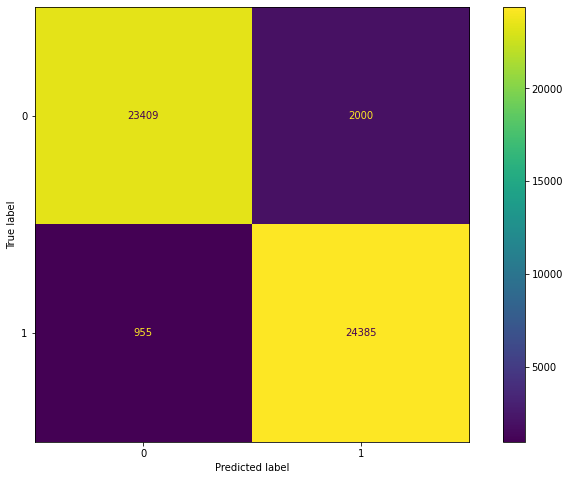

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

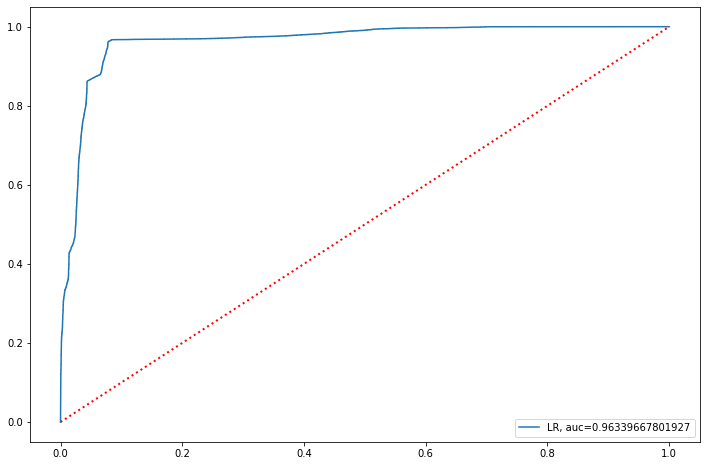

In [39]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle=':')
plt.legend(loc=4)

## Formulando as hipóteses

In [40]:
pandas_profiling.ProfileReport(df_balanced)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**hipóteses!** 

- tipo_PAYMENTé o que a pessoa utiliza como padrão e a fraude ocorre por meio do tipo_TRANSFER

- Cliente pode fazer seus pagamentos durante um periodo do dia ( manhã ) e a fraude ocorre em outro periodo ( madrugada )

- Cliente paga suas contas no começo do mês e houve uma movimentação suspeita no fim do mês ( pode ser fraude )

# Parte 4

## Árvore de Decisão

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt =  DecisionTreeClassifier(max_depth = 5, random_state=SEED)

In [43]:
model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [44]:
model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9622849711324362
Precisão: 0.9381639982043992
Recall: 0.9897000789265983
F1: 0.9632432017206943


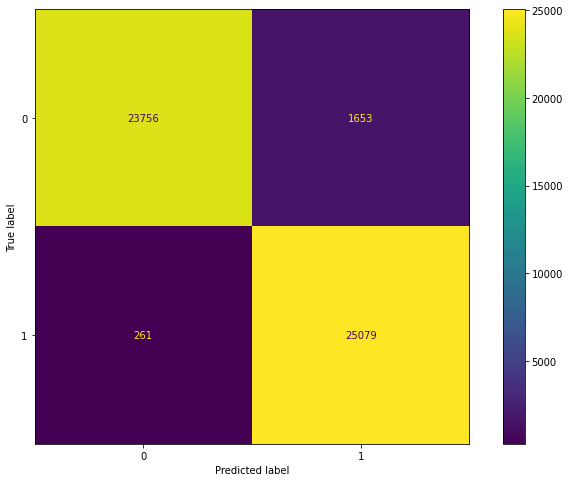

In [45]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

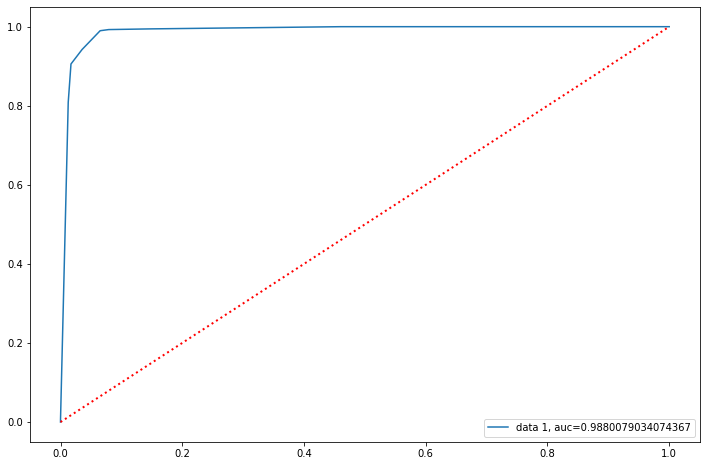

In [46]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle=':')
plt.legend(loc=4)

## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier(max_depth= 5, random_state = SEED)

In [50]:
model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9723738398786183
Precisão: 0.9705165500432424
Recall: 0.9742699289660616
F1: 0.9723896175509079


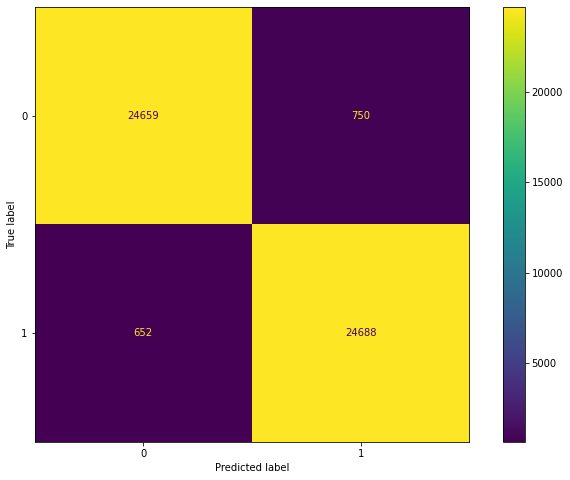

In [51]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

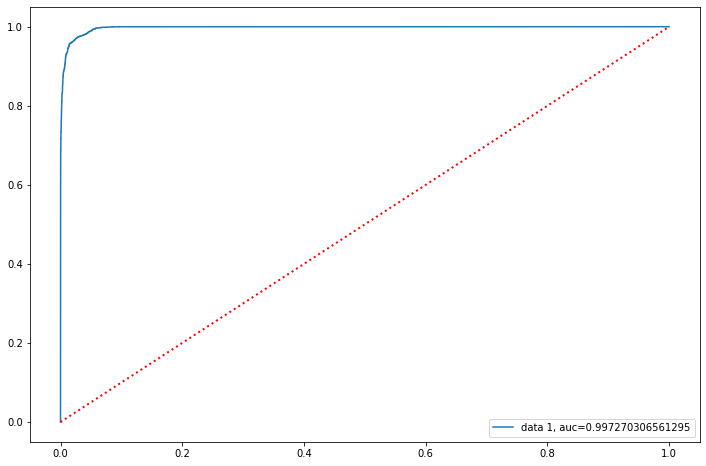

In [53]:
y_pred_proba =  rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle=':')
plt.legend(loc=4)

## Análise de Métricas

In [54]:

classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth = 5, random_state=SEED),
    RandomForestClassifier(max_depth= 5, random_state = SEED)]

In [55]:
for clf in classifiers:
  clf.fit(x_train, y_train)

In [56]:
for clf in classifiers:
  clf.fit(x_train, y_train)
  name = clf.__class__.__name__

In [57]:
for clf in classifiers:
  clf.fit(x_train, y_train)
  name = clf.__class__.__name__
  print("="*30)

In [58]:
for clf in classifiers:
  clf.fit(x_train, y_train)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print('****Resultados****')
  y_pred = clf.predict(x_test)

LogisticRegression
****Resultados****
DecisionTreeClassifier
****Resultados****
RandomForestClassifier
****Resultados****


LogisticRegression
****Resultados****
Accuracy: 0.9417722516699837
Precision: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975
DecisionTreeClassifier
****Resultados****
Accuracy: 0.9622849711324362
Precision: 0.9381639982043992
Recall: 0.9897000789265983
F1: 0.9632432017206943
RandomForestClassifier
****Resultados****
Accuracy: 0.9723738398786183
Precision: 0.9705165500432424
Recall: 0.9742699289660616
F1: 0.9723896175509079


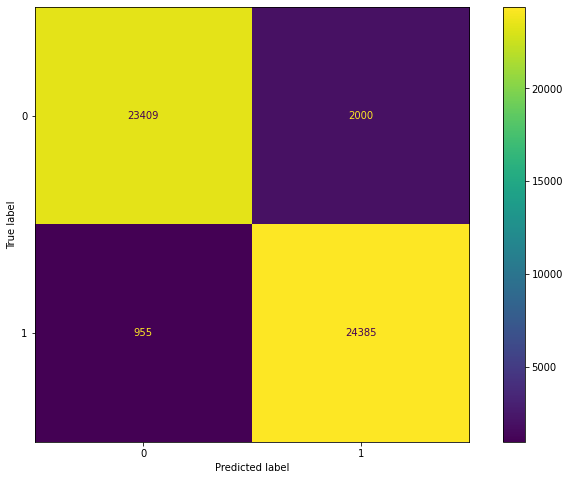

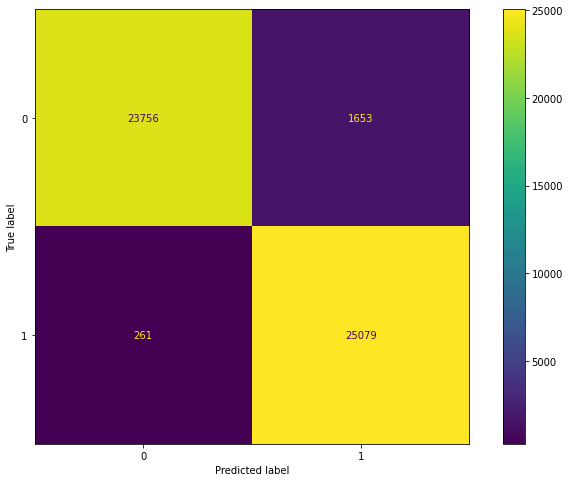

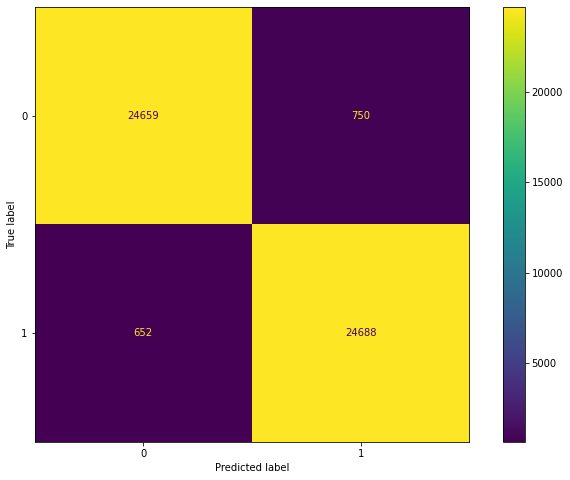

In [61]:
for clf in classifiers:
  clf.fit(x_train, y_train)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print('****Resultados****')
  y_pred = clf.predict(x_test)
  print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
  print("Precision:", metrics.precision_score(y_test, y_pred))
  print("Recall:", metrics.recall_score(y_test, y_pred))
  print("F1:", metrics.f1_score(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

# Parte 5

## Melhorando o modelo

In [62]:
n_estimators = np.arange(20, 200, step=20)

In [63]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]

In [64]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]

In [65]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))

In [66]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]

In [67]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [68]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 70

rforest = RandomForestClassifier(random_state=SEED)

In [71]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state = SEED
)

In [72]:
%%time
rcv = random_cv.fit(x, y)

CPU times: user 27 s, sys: 242 ms, total: 27.3 s
Wall time: 3min 1s


In [75]:
pd.DataFrame(rcv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      31.818432      2.256717         0.843459        0.042531   
1      12.459735      1.279818         0.610741        0.007933   
2      13.140653      0.335542         0.297267        0.011285   
3      25.200420      2.786378         0.718168        0.044611   
4      15.751268      0.237542         0.990777        0.421603   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                120                       4                      2   
1                120                       4                      2   
2                 40                       8                      1   
3                100                       8                      4   
4                160                       6                      2   

  param_max_features param_max_depth param_criterion param_bootstrap  \
0               auto               9            gini           False   
1               auto               2            gini           False   
2               sqrt               7         entropy           False   
3               log2               9         entropy            True   
4               log2               2            gini           False   

                                              params  split0_test_score  \
0  {'n_estimators': 120, 'min_samples_split': 4, ...           0.991665   
1  {'n_estimators': 120, 'min_samples_split': 4, ...           0.914223   
2  {'n_estimators': 40, 'min_samples_split': 8, '...           0.980285   
3  {'n_estimators': 100, 'min_samples_split': 8, ...           0.993497   
4  {'n_estimators': 160, 'min_samples_split': 6, ...           0.914223   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999438           0.992817         0.994640        0.003425   
1           0.936009           0.862704         0.904312        0.030736   
2           1.000000           0.973812         0.984699        0.011138   
3           0.999025           0.992226         0.994916        0.002951   
4           0.943487           0.876537         0.911416        0.027404   

   rank_test_score  
0                2  
1                5  
2                3  
3                1  
4                4

In [78]:
rcv.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

## Resultados Finais

In [81]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state = SEED) # ** < referenciando a outra função que foi aplicada na célula acima.

model = rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9915860411042582
Precisão: 0.9906258615936036
Recall: 0.9925414364640884
F1: 0.9915827238857459


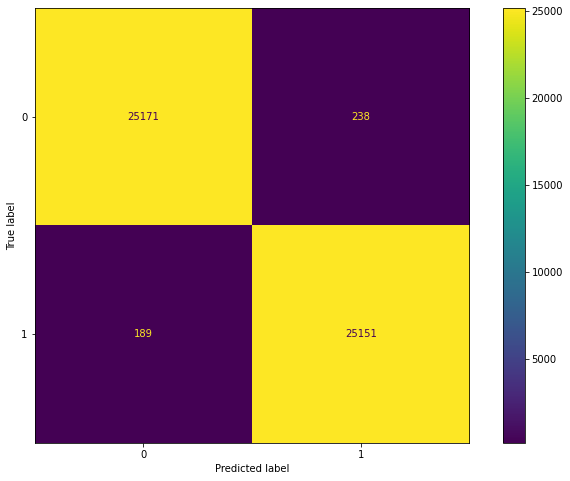

In [82]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#189 casos de fraude e 238 casos de comportamentos diferentes do comum ( horários / valores )

## Conclusão

**Inserir as soluções para cada hipótese aqui!** (dê um duplo clique na célula)